# Using temperature as our target variable

## Load Libraries

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv('/Weather Data.csv')

In [4]:
df.head(5)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
df.shape

(8784, 8)

In [8]:
## Data Preprocessing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [39]:
# Convert the 'Date/Time' column to the desired format
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M').dt.strftime('%d.%m.%Y %H:%M:%S')

In [15]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,01.01.2012 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,01.01.2012 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,01.01.2012 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,01.01.2012 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,01.01.2012 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [40]:
df.index = pd.to_datetime(df['Date/Time'], format='%d.%m.%Y %H:%M:%S')

In [17]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,,
01.01.2012 00:00:00,01.01.2012 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
01.01.2012 01:00:00,01.01.2012 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
01.01.2012 02:00:00,01.01.2012 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
01.01.2012 03:00:00,01.01.2012 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
01.01.2012 04:00:00,01.01.2012 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [41]:
df['Weather'].nunique()

50

<Axes: title={'center': 'Temperature Time Series'}, xlabel='Date/Time', ylabel='Temperature (°C)'>

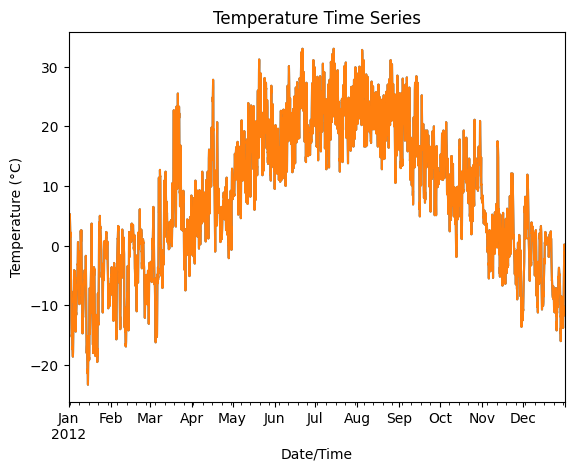

In [42]:
temp = df['Temp_C']
# Plot the temperature data with labels
temp.plot(xlabel='Date/Time', ylabel='Temperature (°C)', title='Temperature Time Series')

In [43]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [44]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((8779, 5, 1), (8779,))

In [45]:
X_train1, y_train1 = X1[:7000], y1[:7000]
X_val1, y_val1 = X1[7000:7500], y1[7000:7500]
X_test1, y_test1 = X1[7500:], y1[7500]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((7000, 5, 1), (7000,), (500, 5, 1), (500,), (1279, 5, 1), ())

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [48]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
219/219 [==============================] - 9s 27ms/step - loss: 250.2458 - root_mean_squared_error: 15.8192 - val_loss: 92.4915 - val_root_mean_squared_error: 9.6173
Epoch 2/10
219/219 [==============================] - 5s 24ms/step - loss: 210.3608 - root_mean_squared_error: 14.5038 - val_loss: 54.1243 - val_root_mean_squared_error: 7.3569
Epoch 3/10
219/219 [==============================] - 6s 28ms/step - loss: 148.3503 - root_mean_squared_error: 12.1799 - val_loss: 26.7026 - val_root_mean_squared_error: 5.1675
Epoch 4/10
219/219 [==============================] - 5s 22ms/step - loss: 100.6791 - root_mean_squared_error: 10.0339 - val_loss: 12.5306 - val_root_mean_squared_error: 3.5399
Epoch 5/10
219/219 [==============================] - 6s 29ms/step - loss: 69.8941 - root_mean_squared_error: 8.3603 - val_loss: 6.4025 - val_root_mean_squared_error: 2.5303
Epoch 6/10
219/219 [==============================] - 5s 24ms/step - loss: 51.3564 - root_mean_squared_error: 7.1663 -

In [49]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [50]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

219/219 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,-1.378943,-1.4
1,-1.282221,-1.5
2,-1.274462,-1.4
3,-1.294731,-1.4
4,-1.279621,-1.3
...,...,...
6995,17.670994,18.3
6996,17.611767,16.6
6997,17.257395,16.0
6998,16.717823,15.6


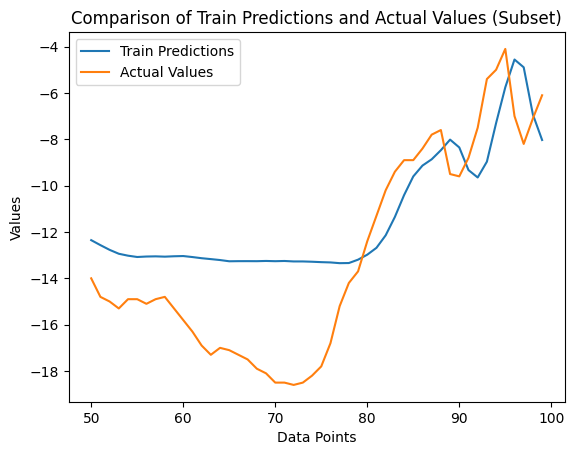

In [56]:
# Create the plot
plt.plot(train_results['Train Predictions'][50:100], label='Train Predictions')
plt.plot(train_results['Actuals'][50:100], label='Actual Values')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of Train Predictions and Actual Values (Subset)')

# Add a legend to differentiate the two lines
plt.legend()

# Show the plot
plt.show()

In [52]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

16/16 [==============================] - 0s 6ms/step


,Val Predictions,Actuals
0,15.614420,13.8
1,14.726606,14.4
2,14.545338,12.7
3,13.423897,12.3
4,12.681749,11.7
...,...,...
495,3.152179,3.9
496,4.638188,4.7
497,5.835226,5.1
498,6.166363,5.2


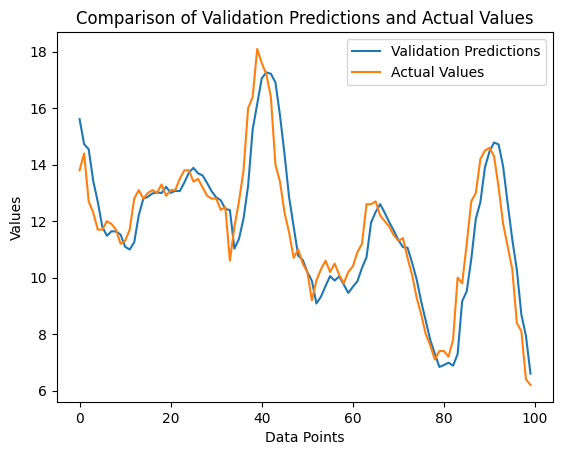

In [55]:
# Create the plot
plt.plot(val_results['Val Predictions'][:100], label='Validation Predictions')
plt.plot(val_results['Actuals'][:100], label='Actual Values')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of Validation Predictions and Actual Values')

# Add a legend to differentiate the two lines
plt.legend()

# Show the plot
plt.show()

In [57]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

40/40 [==============================] - 0s 7ms/step


,Test Predictions,Actuals
0,4.873891,3.2
1,3.550279,3.2
2,2.138659,3.2
3,0.879095,3.2
4,0.486276,3.2
...,...,...
1274,-0.967299,3.2
1275,-0.478031,3.2
1276,0.166312,3.2
1277,0.137114,3.2


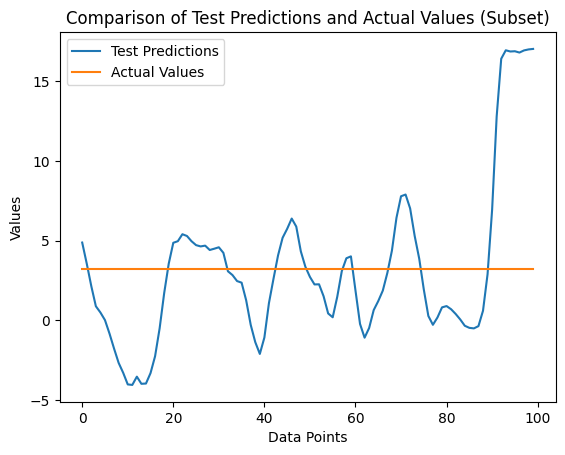

In [60]:
# Create the plot
plt.plot(test_results['Test Predictions'][:100], label='Test Predictions')
plt.plot(test_results['Actuals'][:100], label='Actual Values')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of Test Predictions and Actual Values (Subset)')

# Add a legend to differentiate the two lines
plt.legend()

# Show the plot
plt.show()

# Using More Variables

In [63]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 2056      
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [65]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
219/219 [==============================] - 2s 6ms/step - loss: 59.1099 - root_mean_squared_error: 7.6883 - val_loss: 2.9482 - val_root_mean_squared_error: 1.7170
Epoch 2/10
219/219 [==============================] - 1s 6ms/step - loss: 4.3797 - root_mean_squared_error: 2.0928 - val_loss: 2.3771 - val_root_mean_squared_error: 1.5418
Epoch 3/10
219/219 [==============================] - 2s 7ms/step - loss: 3.6367 - root_mean_squared_error: 1.9070 - val_loss: 1.9868 - val_root_mean_squared_error: 1.4095
Epoch 4/10
219/219 [==============================] - 2s 9ms/step - loss: 2.9920 - root_mean_squared_error: 1.7298 - val_loss: 1.6438 - val_root_mean_squared_error: 1.2821
Epoch 5/10
219/219 [==============================] - 1s 5ms/step - loss: 2.4449 - root_mean_squared_error: 1.5636 - val_loss: 1.3540 - val_root_mean_squared_error: 1.1636
Epoch 6/10
219/219 [==============================] - 1s 5ms/step - loss: 2.0211 - root_mean_squared_error: 1.4216 - val_loss: 1.1649 - val

In [66]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [68]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
219/219 [==============================] - 9s 23ms/step - loss: 205.7511 - root_mean_squared_error: 14.3440 - val_loss: 39.0645 - val_root_mean_squared_error: 6.2502
Epoch 2/10
219/219 [==============================] - 7s 33ms/step - loss: 117.5183 - root_mean_squared_error: 10.8406 - val_loss: 10.9988 - val_root_mean_squared_error: 3.3164
Epoch 3/10
219/219 [==============================] - 5s 25ms/step - loss: 64.9557 - root_mean_squared_error: 8.0595 - val_loss: 6.0075 - val_root_mean_squared_error: 2.4510
Epoch 4/10
219/219 [==============================] - 6s 27ms/step - loss: 40.3981 - root_mean_squared_error: 6.3560 - val_loss: 2.8567 - val_root_mean_squared_error: 1.6902
Epoch 5/10
219/219 [==============================] - 6s 30ms/step - loss: 24.9262 - root_mean_squared_error: 4.9926 - val_loss: 1.5762 - val_root_mean_squared_error: 1.2555
Epoch 6/10
219/219 [==============================] - 7s 34ms/step - loss: 15.3282 - root_mean_squared_error: 3.9151 - val_l

In [69]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date/Time,,
2012-01-01 00:00:00,-1.8,1.325376e+09
2012-01-01 01:00:00,-1.8,1.325380e+09
2012-01-01 02:00:00,-1.8,1.325383e+09
2012-01-01 03:00:00,-1.5,1.325387e+09
2012-01-01 04:00:00,-1.5,1.325390e+09
...,...,...
2012-12-31 19:00:00,0.1,1.356980e+09
2012-12-31 20:00:00,0.2,1.356984e+09
2012-12-31 21:00:00,-0.5,1.356988e+09


In [70]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date/Time,,,,,,
2012-01-01 00:00:00,-1.8,1.325376e+09,-9.697354e-12,1.000000,-0.003183,0.999995
2012-01-01 01:00:00,-1.8,1.325380e+09,2.588190e-01,0.965926,-0.002466,0.999997
2012-01-01 02:00:00,-1.8,1.325383e+09,5.000000e-01,0.866025,-0.001749,0.999998
2012-01-01 03:00:00,-1.5,1.325387e+09,7.071068e-01,0.707107,-0.001032,0.999999
2012-01-01 04:00:00,-1.5,1.325390e+09,8.660254e-01,0.500000,-0.000315,1.000000


In [71]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date/Time,,,,,
2012-01-01 00:00:00,-1.8,-9.697354e-12,1.000000,-0.003183,0.999995
2012-01-01 01:00:00,-1.8,2.588190e-01,0.965926,-0.002466,0.999997
2012-01-01 02:00:00,-1.8,5.000000e-01,0.866025,-0.001749,0.999998
2012-01-01 03:00:00,-1.5,7.071068e-01,0.707107,-0.001032,0.999999
2012-01-01 04:00:00,-1.5,8.660254e-01,0.500000,-0.000315,1.000000


In [72]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [73]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((8778, 6, 5), (8778,))

In [74]:
X2_train, y2_train = X2[:7000], y2[:7000]
X2_val, y2_val = X2[7000:7500], y2[7000:7500]
X2_test, y2_test = X2[7500:], y2[7500:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((7000, 6, 5), (7000,), (500, 6, 5), (500,), (1278, 6, 5), (1278,))

In [75]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [76]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[-5.83042148e-01,  1.24561929e-11, -1.00000000e+00,
         -7.89810504e-01,  6.13350934e-01],
        [-5.15137205e-01, -2.58819045e-01, -9.65925826e-01,
         -7.89370662e-01,  6.13916898e-01],
        [-4.81184734e-01, -5.00000000e-01, -8.66025404e-01,
         -7.88930414e-01,  6.14482548e-01],
        [-4.72696616e-01, -7.07106781e-01, -7.07106781e-01,
         -7.88489762e-01,  6.15047881e-01],
        [-5.40601559e-01, -8.66025404e-01, -5.00000000e-01,
         -7.88048704e-01,  6.15612899e-01],
        [-6.42458974e-01, -9.65925826e-01, -2.58819045e-01,
         -7.87607241e-01,  6.16177600e-01]],

       [[-5.15137205e-01, -2.58819045e-01, -9.65925826e-01,
         -7.89370662e-01,  6.13916898e-01],
        [-4.81184734e-01, -5.00000000e-01, -8.66025404e-01,
         -7.88930414e-01,  6.14482548e-01],
        [-4.72696616e-01, -7.07106781e-01, -7.07106781e-01,
         -7.88489762e-01,  6.15047881e-01],
        [-5.40601559e-01, -8.66025404e-01, -5.00000000e-01,
  

In [77]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                17920     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [79]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
219/219 [==============================] - 9s 30ms/step - loss: 241.3949 - root_mean_squared_error: 15.5369 - val_loss: 88.0285 - val_root_mean_squared_error: 9.3824
Epoch 2/10
219/219 [==============================] - 6s 26ms/step - loss: 136.6528 - root_mean_squared_error: 11.6899 - val_loss: 30.3172 - val_root_mean_squared_error: 5.5061
Epoch 3/10
219/219 [==============================] - 6s 27ms/step - loss: 60.6300 - root_mean_squared_error: 7.7865 - val_loss: 12.8272 - val_root_mean_squared_error: 3.5815
Epoch 4/10
219/219 [==============================] - 6s 26ms/step - loss: 38.5951 - root_mean_squared_error: 6.2125 - val_loss: 9.6446 - val_root_mean_squared_error: 3.1056
Epoch 5/10
219/219 [==============================] - 1s 6ms/step - loss: 28.4157 - root_mean_squared_error: 5.3306 - val_loss: 11.9864 - val_root_mean_squared_error: 3.4621
Epoch 6/10
219/219 [==============================] - 1s 6ms/step - loss: 21.5435 - root_mean_squared_error: 4.6415 - val_l

40/40 [==============================] - 1s 3ms/step


(      Predictions  Actuals
 0        2.472641      2.4
 1        2.106961      1.8
 2        1.591034      1.7
 3        0.978997      0.5
 4       -0.454517     -0.3
 ...           ...      ...
 1273    -4.148230      0.1
 1274    -3.675376      0.2
 1275    -3.397242     -0.5
 1276    -3.363893     -0.2
 1277    -3.517341      0.0
 
 [1278 rows x 2 columns],
 7.755599900993728)

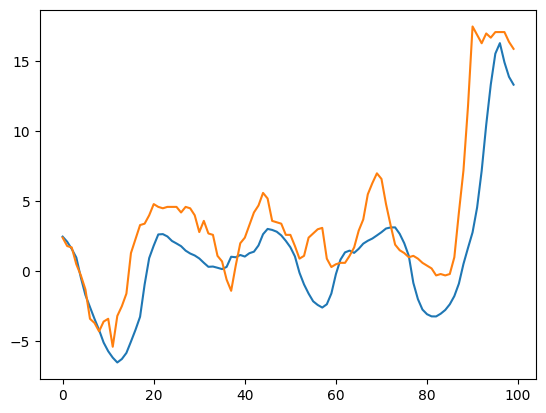

In [80]:
plot_predictions1(model4, X2_test, y2_test)

In [82]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [83]:
p_temp_df = pd.concat([df['Press_kPa'], temp_df], axis=1)
p_temp_df.head()

,Press_kPa,Temperature,Day sin,Day cos,Year sin,Year cos
Date/Time,,,,,,
2012-01-01 00:00:00,101.24,-1.8,-9.697354e-12,1.000000,-0.003183,0.999995
2012-01-01 01:00:00,101.24,-1.8,2.588190e-01,0.965926,-0.002466,0.999997
2012-01-01 02:00:00,101.26,-1.8,5.000000e-01,0.866025,-0.001749,0.999998
2012-01-01 03:00:00,101.27,-1.5,7.071068e-01,0.707107,-0.001032,0.999999
2012-01-01 04:00:00,101.23,-1.5,8.660254e-01,0.500000,-0.000315,1.000000


In [84]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [85]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((8777, 7, 6), (8777, 2))

In [86]:
X3_train, y3_train = X3[:7000], y3[:7000]
X3_val, y3_val = X3[7000:7500], y3[7000:7500]
X3_test, y3_test = X3[7500:], y3[7500:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((7000, 7, 6), (7000, 2), (500, 7, 6), (500, 2), (1277, 7, 6), (1277, 2))

In [87]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [88]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [89]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[ 0.37051691, -0.76141989],
       [ 0.38367649, -0.76990829],
       [ 0.33103816, -0.87176914],
       ...,
       [-1.36654797, -0.95665318],
       [-1.4191863 , -0.93118797],
       [-1.44550547, -0.91421116]])

In [90]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                18176     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [92]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
219/219 [==============================] - 9s 28ms/step - loss: 0.7103 - root_mean_squared_error: 0.8428 - val_loss: 0.6071 - val_root_mean_squared_error: 0.7792
Epoch 2/10
219/219 [==============================] - 6s 29ms/step - loss: 0.4258 - root_mean_squared_error: 0.6526 - val_loss: 0.5206 - val_root_mean_squared_error: 0.7215
Epoch 3/10
219/219 [==============================] - 5s 23ms/step - loss: 0.3357 - root_mean_squared_error: 0.5794 - val_loss: 0.4838 - val_root_mean_squared_error: 0.6955
Epoch 4/10
219/219 [==============================] - 5s 23ms/step - loss: 0.2659 - root_mean_squared_error: 0.5156 - val_loss: 0.4175 - val_root_mean_squared_error: 0.6461
Epoch 5/10
219/219 [==============================] - 7s 34ms/step - loss: 0.1664 - root_mean_squared_error: 0.4079 - val_loss: 0.2087 - val_root_mean_squared_error: 0.4568
Epoch 6/10
219/219 [==============================] - 5s 23ms/step - loss: 0.0813 - root_mean_squared_error: 0.2852 - val_loss: 0.0682 

In [95]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
    p_actuals, temp_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                            'Temperature Actuals': temp_actuals,
                            'Pressure Predictions': p_preds,
                            'Pressure Actuals': p_actuals
                            })

    # Plot temperature predictions and actuals
    plt.plot(df['Temperature Predictions'][start:end], label='Temperature Predictions')
    plt.plot(df['Temperature Actuals'][start:end], label='Temperature Actuals')

    # Plot pressure predictions and actuals
    plt.plot(df['Pressure Predictions'][start:end], label='Pressure Predictions')
    plt.plot(df['Pressure Actuals'][start:end], label='Pressure Actuals')

    # Add legend to distinguish the lines
    plt.legend()

    # Return the DataFrame with the specified range
    return df[start:end]

# Example usage:
# df_subset = plot_predictions2(model, X, y, start=0, end=100)
# plt.show()  # Use this line to display the plot if needed

40/40 [==============================] - 0s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,-0.589113,-0.761420,0.190397,0.370517
1,-0.644189,-0.769908,0.222782,0.383676
2,-0.698648,-0.871769,0.244236,0.331038
3,-0.755670,-0.939676,0.246964,0.291559
4,-0.807807,-1.024560,0.235697,0.265240
...,...,...,...,...
95,0.402324,0.537306,0.361837,0.133644
96,0.362164,0.537306,0.292031,-0.011111
97,0.296221,0.477887,0.201104,-0.103228
98,0.245127,0.435445,0.111141,-0.116388


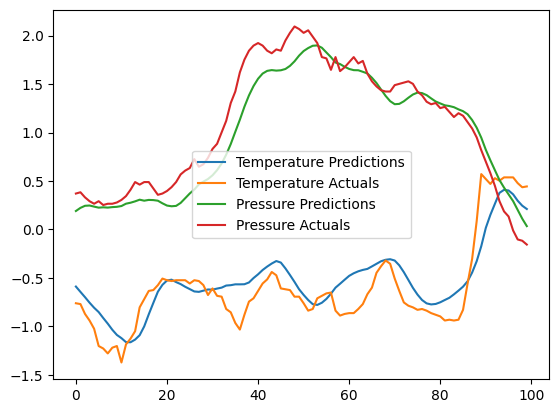

In [96]:
plot_predictions2(model5, X3_test, y3_test)

In [97]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [100]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
    p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                            'Temperature Actuals': temp_actuals,
                            'Pressure Predictions': p_preds,
                            'Pressure Actuals': p_actuals
                            })

    # Plot temperature predictions and actuals
    plt.plot(df['Temperature Predictions'][start:end], label='Temperature Predictions')
    plt.plot(df['Temperature Actuals'][start:end], label='Temperature Actuals')

    # Plot pressure predictions and actuals
    plt.plot(df['Pressure Predictions'][start:end], label='Pressure Predictions')
    plt.plot(df['Pressure Actuals'][start:end], label='Pressure Actuals')

    # Add legend to distinguish the lines
    plt.legend()

    # Return the DataFrame with the specified range
    return df[start:end]



40/40 [==============================] - 0s 4ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,3.829908,1.8,101.133125,101.27
1,3.181073,1.7,101.157730,101.28
2,2.539503,0.5,101.174034,101.24
3,1.867739,-0.3,101.176109,101.21
4,1.253529,-1.3,101.167549,101.19
...,...,...,...,...
95,15.509811,17.1,101.263405,101.09
96,15.036693,17.1,101.210358,100.98
97,14.259831,16.4,101.141258,100.91
98,13.657901,15.9,101.072899,100.90


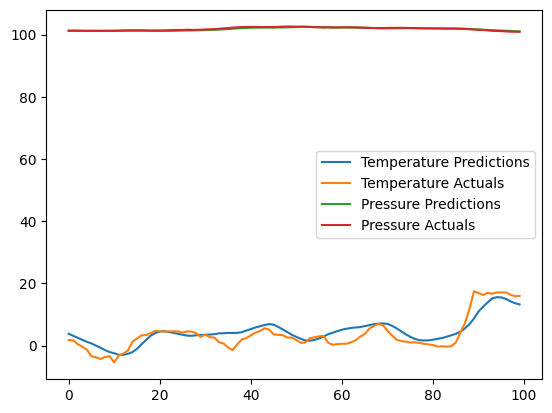

In [101]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

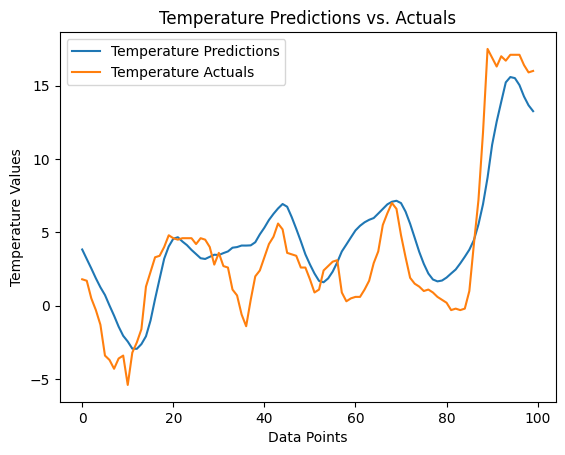

In [103]:
# Plot temperature predictions and actuals
plt.plot(post_processed_df['Temperature Predictions'][start:end], label='Temperature Predictions')
plt.plot(post_processed_df['Temperature Actuals'][start:end], label='Temperature Actuals')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Temperature Values')
plt.title('Temperature Predictions vs. Actuals')

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.show()

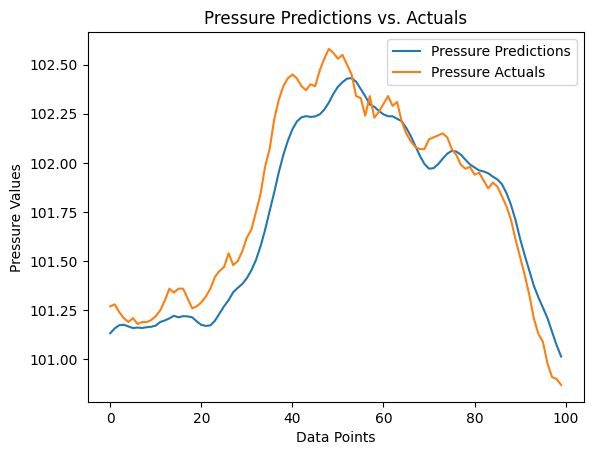

In [104]:
# Plot pressure predictions and actuals
plt.plot(post_processed_df['Pressure Predictions'][start:end], label='Pressure Predictions')
plt.plot(post_processed_df['Pressure Actuals'][start:end], label='Pressure Actuals')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Pressure Values')
plt.title('Pressure Predictions vs. Actuals')

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.show()

In [105]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_5 (LSTM)               (None, 64)                24832     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30362 (118.60 KB)
Trainable params: 30362 (118.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [107]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
219/219 [==============================] - 18s 56ms/step - loss: 0.6906 - root_mean_squared_error: 0.8310 - val_loss: 0.1864 - val_root_mean_squared_error: 0.4318
Epoch 2/10
219/219 [==============================] - 11s 52ms/step - loss: 0.2244 - root_mean_squared_error: 0.4737 - val_loss: 0.0582 - val_root_mean_squared_error: 0.2412
Epoch 3/10
219/219 [==============================] - 11s 52ms/step - loss: 0.0865 - root_mean_squared_error: 0.2941 - val_loss: 0.0530 - val_root_mean_squared_error: 0.2303
Epoch 4/10
219/219 [==============================] - 10s 48ms/step - loss: 0.0691 - root_mean_squared_error: 0.2629 - val_loss: 0.0463 - val_root_mean_squared_error: 0.2151
Epoch 5/10
219/219 [==============================] - 11s 50ms/step - loss: 0.0610 - root_mean_squared_error: 0.2470 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1962
Epoch 6/10
219/219 [==============================] - 10s 44ms/step - loss: 0.0553 - root_mean_squared_error: 0.2351 - val_loss: 0

In [108]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_14 (Dense)            (None, 8)                 3080      
                                                                 
 dense_15 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3930 (15.35 KB)
Trainable params: 3930 (15.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
219/219 [==============================] - 2s 6ms/step - loss: 0.4557 - root_mean_squared_error: 0.6750 - val_loss: 0.0963 - val_root_mean_squared_error: 0.3103
Epoch 2/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0990 - root_mean_squared_error: 0.3146 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1759
Epoch 3/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0528 - root_mean_squared_error: 0.2297 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1516
Epoch 4/10
219/219 [==============================] - 2s 7ms/step - loss: 0.0385 - root_mean_squared_error: 0.1963 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1444
Epoch 5/10
219/219 [==============================] - 2s 7ms/step - loss: 0.0309 - root_mean_squared_error: 0.1758 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1317
Epoch 6/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0256 - root_mean_squared_error: 0.1600 - val_loss: 0.0162 - val_